# Scientific Computing

## Exercise set 1

Author: 
- Kevin de Vries

Student number: 
- 10579869

This environment makes use of python 3.6.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

# import the source code used for the exercise set
from source_exercise1 import *

# Vibrating string

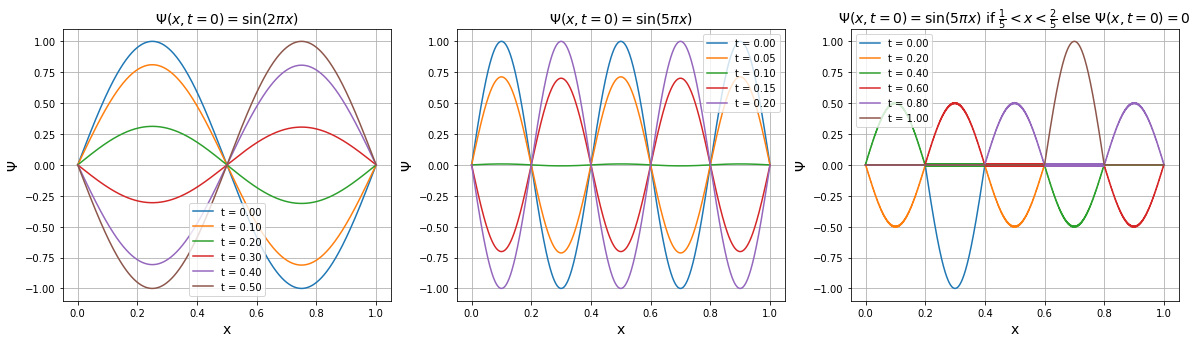

In [2]:
# Define the initial condition functions
init_psi_1 = lambda x: np.sin(2*np.pi*x)
init_psi_2 = lambda x: np.sin(5*np.pi*x)

def init_psi_3(x):
    res = init_psi_2(x)
    res[x < 1/5] = 0
    res[x > 2/5] = 0
    return res

init_psi_t = lambda x: 0

# Initialize the fixed parameters
step = N,M,dt = 1000,1000,0.001
bound = psi0,psiN = 0,0
misc = c,L = 1,1

# Solve the wave equations
psi1 = solve_1D_wave_eq(step,(init_psi_1,init_psi_t),bound,misc)
psi2 = solve_1D_wave_eq(step,(init_psi_2,init_psi_t),bound,misc)
psi3 = solve_1D_wave_eq(step,(init_psi_3,init_psi_t),bound,misc)

psi_list = [psi1,psi2,psi3]

# Specify plot ranges
range_list = [np.arange(0,501,100),np.arange(0,201,50),np.arange(0,1001,200)]

# Specify plot titles
title_list = [r"$\Psi(x,t=0) = \sin(2 \pi x)$",r"$\Psi(x,t=0) = \sin(5 \pi x)$",
              r"$\Psi(x,t=0) = \sin(5 \pi x)$ if $\frac{1}{5}<x<\frac{2}{5}$ else $\Psi(x,t=0) = 0$"]

plt.figure(figsize=(20,5))
for n in range(3):
    plt.subplot(1,3,n+1)
    plt.title(title_list[n],fontsize=14)
    plt.xlabel("x",fontsize=14)
    plt.ylabel(r"$\Psi$",fontsize=14)
    plt.grid(True)
    for i in range_list[n]:
        plt.plot(np.arange(0,N+1)*(L/N),psi_list[n][i,:],label="t = %.2f" % (i*dt))
    
    plt.legend()
    
plt.show()

# Time Dependent Diffusion Equation

In [3]:
# Define initial conditions
init_c = lambda x,y: 0

# Define boundary conditions
bound_y0 = lambda x: 0
bound_yN = lambda x: 1

# Initialize the fixed parameters
step = N,M,dt = 50,10000,0.0001
misc = D,xmin,xmax = 1,0,1

# Solve the time dependent diffusion equation
c = solve_2D_diffusion_eq(step,init_c,(bound_y0,bound_yN),misc)
y = (xmax-xmin) / N *np.arange(0,N+1)

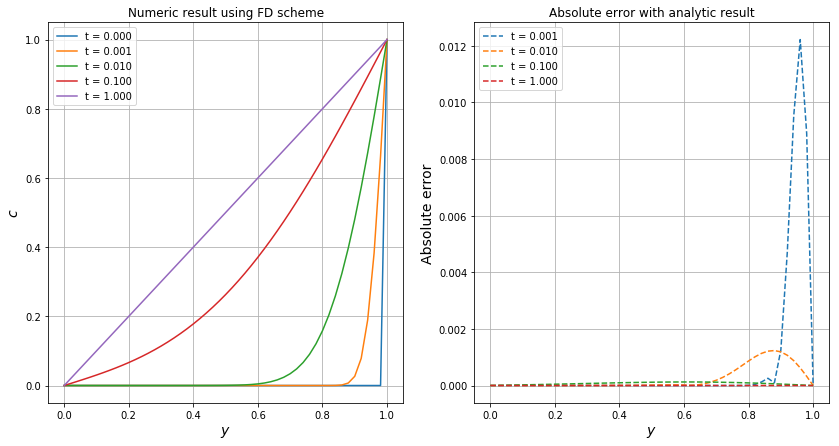

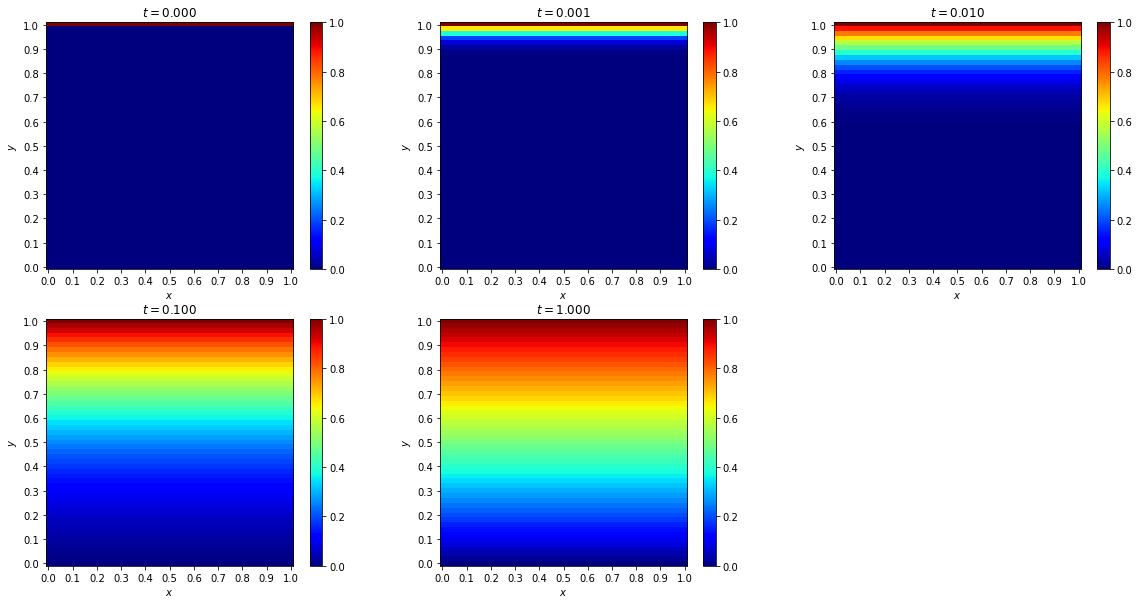

In [4]:
# Plot concentration as a function of y
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,7))

for i in [0,10,100,1000,10000]:
    ax1.plot(y,c[i,0,:],label="t = %.3f" % (i/M))
    
    if i != 0:
        analytic = solve_2D_diffusion_analytic(y,i/M,1000,D)
        ax2.plot(y,np.abs(c[i,0,:]-analytic),'--',label="t = %.3f" % (i/M))

ax1.set_title("Numeric result using FD scheme")
ax1.set_xlabel(r"$y$",fontsize=14)
ax1.set_ylabel(r"$c$",fontsize=14)
ax1.grid(True)
ax1.legend()

ax2.set_title("Absolute error with analytic result")
ax2.set_xlabel(r"$y$",fontsize=14)
ax2.set_ylabel(r"Absolute error",fontsize=14)
ax2.grid(True)
ax2.legend()

plt.show()

t_indices = [0,10,100,1000,10000]

# Plot 2D domain for different t
plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    
    plt.title(r"$t = %.3f$" % (t_indices[i]*dt))
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    
    plt.xticks(np.arange(0,N+1,5),(xmax-xmin) * np.arange(0,N+1,5) / N)
    plt.yticks(np.arange(0,N+1,5),(xmax-xmin) * np.arange(0,N+1,5) / N)
    
    plt.imshow(c[t_indices[i],:,:].T,origin="lower",cmap="jet")
    
    plt.colorbar()

plt.show()

# Time Independent Diffusion Equation

In [5]:
# Define initial and boundary conditions
init_c = lambda x,y: 0

bound_y0 = lambda x: 0
bound_yN = lambda x: 1

# Initialize the fixed parameters
N = 50
misc = xmin,xmax = 0,1
eps = 10**-5
omega = 1.7

c_ja,deltas_ja = solve_laplace_jacobi(N,eps,init_c,(bound_y0,bound_yN),misc)
c_GS,deltas_GS = solve_laplace_SOR(N,eps,init_c,(bound_y0,bound_yN),misc,w=1)
c_SOR,deltas_SOR = solve_laplace_SOR(N,eps,init_c,(bound_y0,bound_yN),misc,w=omega)

Iterations Jacobi: 4195
Iterations Gauss-Seidel: 2450
Iterations SOR: 582


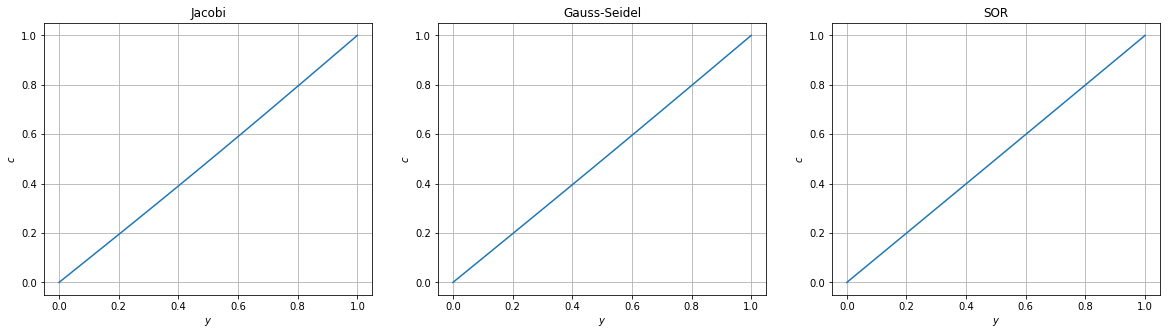

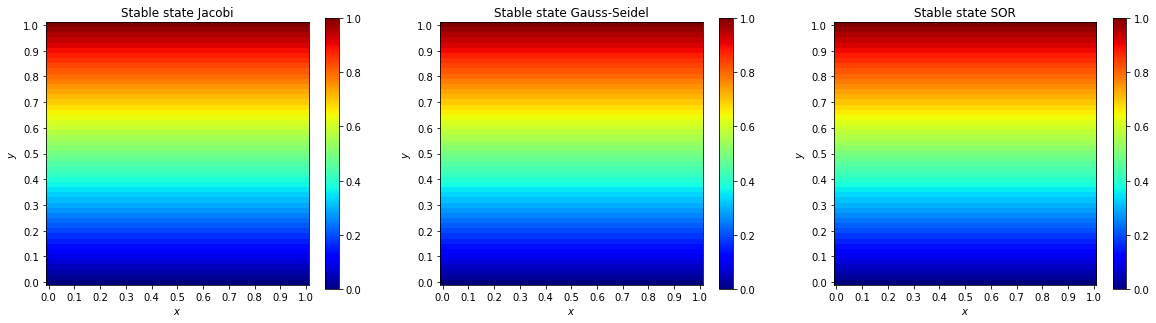

In [6]:
print("Iterations Jacobi: %i" % len(deltas_ja))
print("Iterations Gauss-Seidel: %i" % len(deltas_GS))
print("Iterations SOR: %i" % len(deltas_SOR))

# test convergence
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title("Jacobi")
plt.xlabel(r"$y$")
plt.ylabel(r"$c$")
plt.plot((1/N)*np.arange(0,N+1),c_ja[0,:])
plt.grid(True)
plt.subplot(1,3,2)
plt.title("Gauss-Seidel")
plt.xlabel(r"$y$")
plt.ylabel(r"$c$")
plt.plot((1/N)*np.arange(0,N+1),c_GS[0,:])
plt.grid(True)
plt.subplot(1,3,3)
plt.title("SOR")
plt.xlabel(r"$y$")
plt.ylabel(r"$c$")
plt.plot((1/N)*np.arange(0,N+1),c_SOR[0,:])
plt.grid(True)
plt.show()

# visualize stable state 
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("Stable state Jacobi")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.xticks(np.arange(0,N+1,5),(xmax-xmin) * np.arange(0,N+1,5) / N)
plt.yticks(np.arange(0,N+1,5),(xmax-xmin) * np.arange(0,N+1,5) / N)

plt.imshow(c_ja.T,origin="lower",cmap="jet")
plt.colorbar()

plt.subplot(1,3,2)
plt.title("Stable state Gauss-Seidel")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.xticks(np.arange(0,N+1,5),(xmax-xmin) * np.arange(0,N+1,5) / N)
plt.yticks(np.arange(0,N+1,5),(xmax-xmin) * np.arange(0,N+1,5) / N)

plt.imshow(c_GS.T,origin="lower",cmap="jet")
plt.colorbar()

plt.subplot(1,3,3)
plt.title("Stable state SOR")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.xticks(np.arange(0,N+1,5),(xmax-xmin) * np.arange(0,N+1,5) / N)
plt.yticks(np.arange(0,N+1,5),(xmax-xmin) * np.arange(0,N+1,5) / N)

plt.imshow(c_SOR.T,origin="lower",cmap="jet")
plt.colorbar()
plt.show()

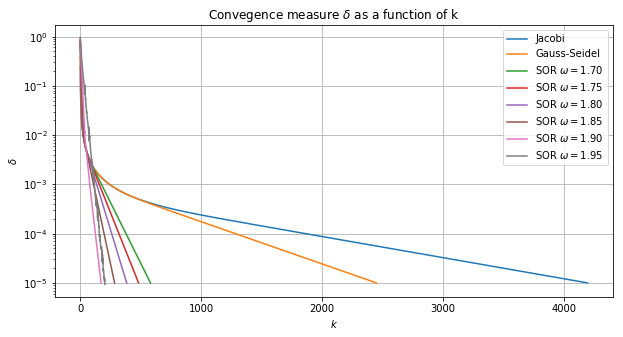

In [7]:
# Plot convergence measure
plt.figure(figsize=(10,5))
plt.title(r"Convegence measure $\delta$ as a function of k")
plt.xlabel(r"$k$")
plt.ylabel(r"$\delta$")

plt.plot(deltas_ja,label="Jacobi")
plt.plot(deltas_GS,label="Gauss-Seidel")
for omega in np.linspace(1.7,1.95,6):
    c_SOR,deltas_SOR = solve_laplace_SOR(N,eps,init_c,(bound_y0,bound_yN),misc,w=omega)
    plt.plot(deltas_SOR,label=r"SOR $\omega = %.2f$" % (omega))

plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()

100%|██████████| 10/10 [00:15<00:00,  2.66s/it]


N = 100: omega = 1.959474


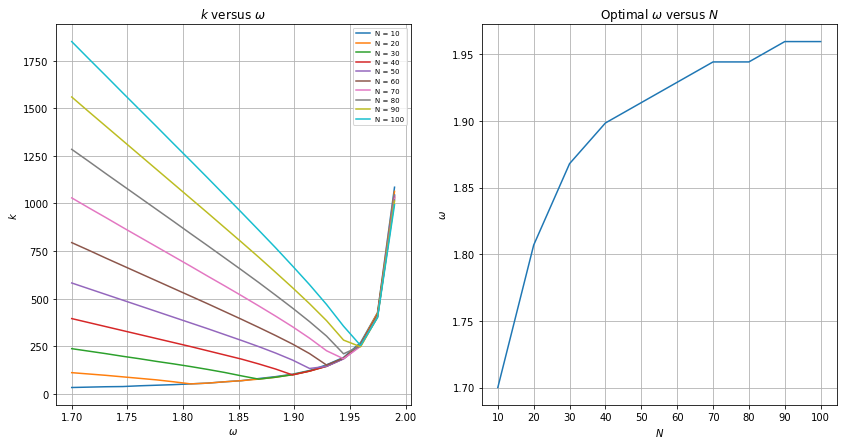

In [8]:
# Find optimal omega for SOR
omegas = np.linspace(1.7,1.99,20)
grid_sizes = np.arange(10,101,10)
opt_omegas = []

plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.title(r"$k$ versus $\omega$")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$k$")

with tqdm.tqdm(total=len(grid_sizes)) as pbar:
    for n in grid_sizes:
        iterations = []
        for omega in omegas:
            _, deltas = solve_laplace_SOR(n,eps,init_c,(bound_y0,bound_yN),misc,w=omega)
            iterations.append(len(deltas))
    
        opt_omegas.append(omegas[np.argmin(iterations)])
        plt.plot(omegas,iterations,label="N = %i" % (n))
        pbar.update()

print('N = 100: omega = %lf' % opt_omegas[-1])
        
plt.grid(True)
plt.legend(fontsize=7)

plt.subplot(1,2,2)
plt.title(r"Optimal $\omega$ versus $N$")
plt.xlabel(r"$N$")
plt.ylabel(r"$\omega$")
plt.xticks(np.arange(10,101,10))
plt.plot(grid_sizes,opt_omegas)
plt.grid(True)
plt.show()

## Objects in grid

In [9]:
# Define initial and boundary conditions
init_c = lambda x,y: 0

bound_y0 = lambda x: 0
bound_yN = lambda x: 1

# Initialize the fixed parameters
N = 100
misc = xmin,xmax = 0,1
eps = 10**-5
omega = 1.96

# initialize object grid
obj_grid = object_grid(N+1,N+1)

# load image
obj_grid.load_image("circle.png")

bool_grid_1 = obj_grid.get_boolean_grid()

c_1,deltas_1 = solve_laplace_SOR(N,eps,init_c,(bound_y0,bound_yN),misc,w=omega,bool_grid=bool_grid_1)

# load rectangles
obj_grid.load_rectangle(15,20,85,90)
obj_grid.load_rectangle(80,85,85,90)

bool_grid_2 = obj_grid.get_boolean_grid()

c_2,deltas_2 = solve_laplace_SOR(N,eps,init_c,(bound_y0,bound_yN),misc,w=omega,bool_grid=bool_grid_2)

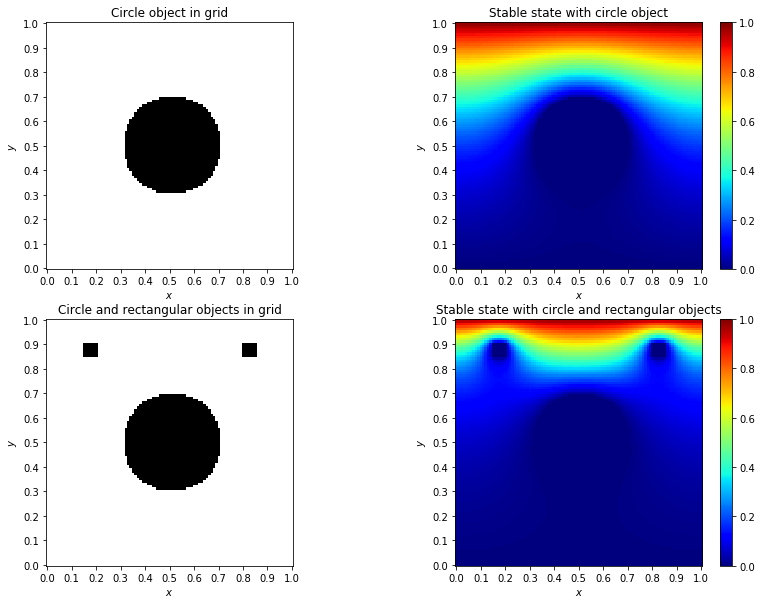

In [10]:
# Visualize the stable states
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.title("Circle object in grid")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.xticks(np.arange(0,N+1,10),(xmax-xmin) * np.arange(0,N+1,10) / N)
plt.yticks(np.arange(0,N+1,10),(xmax-xmin) * np.arange(0,N+1,10) / N)

plt.imshow(bool_grid_1.T,origin='lower',cmap='Greys')

plt.subplot(2,2,2)
plt.title("Stable state with circle object")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.xticks(np.arange(0,N+1,10),(xmax-xmin) * np.arange(0,N+1,10) / N)
plt.yticks(np.arange(0,N+1,10),(xmax-xmin) * np.arange(0,N+1,10) / N)

plt.imshow(c_1.T,origin="lower",cmap="jet")
plt.colorbar()

plt.subplot(2,2,3)
plt.title("Circle and rectangular objects in grid")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.xticks(np.arange(0,N+1,10),(xmax-xmin) * np.arange(0,N+1,10) / N)
plt.yticks(np.arange(0,N+1,10),(xmax-xmin) * np.arange(0,N+1,10) / N)

plt.imshow(bool_grid_2.T,origin='lower',cmap='Greys')

plt.subplot(2,2,4)
plt.title("Stable state with circle and rectangular objects")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.xticks(np.arange(0,N+1,10),(xmax-xmin) * np.arange(0,N+1,10) / N)
plt.yticks(np.arange(0,N+1,10),(xmax-xmin) * np.arange(0,N+1,10) / N)

plt.imshow(c_2.T,origin="lower",cmap="jet")
plt.colorbar()

plt.show()

100%|██████████| 10/10 [00:07<00:00,  1.14s/it]


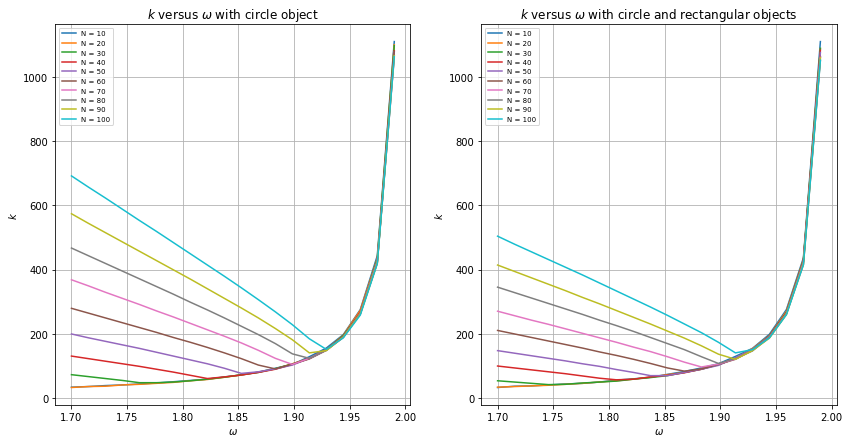

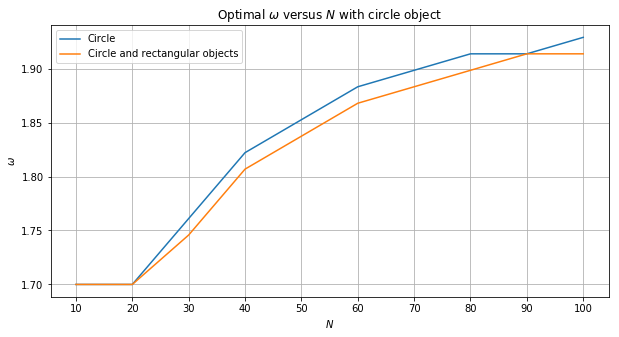

In [11]:
# Find optimal omega for SOR
omegas = np.linspace(1.7,1.99,20)
grid_sizes = np.arange(10,101,10)

fig_iter,(ax1,ax2) = plt.subplots(1,2,figsize=(14,7))
fig_opt,ax_opt = plt.subplots(1,1,figsize=(10,5))

# Compute and plot convergence with circle object only
ax1.set_title(r"$k$ versus $\omega$ with circle object")
ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"$k$")

opt_omegas = []
with tqdm.tqdm(total=len(grid_sizes)) as pbar:
    for n in grid_sizes:
        # initialize object grid
        obj_grid = object_grid(n+1,n+1)
        obj_grid.load_image("circle.png")
        bool_grid = obj_grid.get_boolean_grid()
        
        iterations = []
        for omega in omegas:
            _, deltas = solve_laplace_SOR(n,eps,init_c,(bound_y0,bound_yN),misc,w=omega,bool_grid=bool_grid)
            iterations.append(len(deltas))
    
        opt_omegas.append(omegas[np.argmin(iterations)])
        ax1.plot(omegas,iterations,label="N = %i" % (n))
        pbar.update()
        
ax1.grid(True)
ax1.legend(fontsize=7)

ax_opt.plot(grid_sizes,opt_omegas,label="Circle")

ax2.set_title(r"$k$ versus $\omega$ with circle and rectangular objects")
ax2.set_xlabel(r"$\omega$")
ax2.set_ylabel(r"$k$")

opt_omegas = []
with tqdm.tqdm(total=len(grid_sizes)) as pbar:
    for n in grid_sizes:
        # initialize object grid
        obj_grid = object_grid(n+1,n+1)
        obj_grid.load_image("circle.png")
        obj_grid.load_rectangle(int(0.15*n),int(0.20*n),int(0.85*n),int(0.90*n))
        obj_grid.load_rectangle(int(0.80*n),int(0.85*n),int(0.85*n),int(0.90*n))
        
        bool_grid = obj_grid.get_boolean_grid()
        
        iterations = []
        for omega in omegas:
            _, deltas = solve_laplace_SOR(n,eps,init_c,(bound_y0,bound_yN),misc,w=omega,bool_grid=bool_grid)
            iterations.append(len(deltas))
    
        opt_omegas.append(omegas[np.argmin(iterations)])
        ax2.plot(omegas,iterations,label="N = %i" % (n))
        pbar.update()
        
ax2.grid(True)
ax2.legend(fontsize=7)

ax_opt.plot(grid_sizes,opt_omegas,label="Circle and rectangular objects")

# Compute and plot convergence with circle object and squares at the top
ax_opt.set_title(r"Optimal $\omega$ versus $N$ with circle object")
ax_opt.set_xlabel(r"$N$")
ax_opt.set_ylabel(r"$\omega$")
ax_opt.set_xticks(np.arange(10,101,10))
ax_opt.grid(True)
ax_opt.legend()

plt.show()